In [2]:
from sklearn.datasets import make_regression
import numpy as np
import pandas as pd
#matplotlib notebook
from matplotlib import pyplot as plt
import scipy.stats
import math 
import sklearn
import seaborn as sns
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as sm1
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
%matplotlib notebook
from mpl_toolkits.mplot3d import axes3d, Axes3D
from sklearn import svm, datasets
from sklearn.linear_model import LogisticRegression
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
%matplotlib widget

<IPython.core.display.Javascript object>


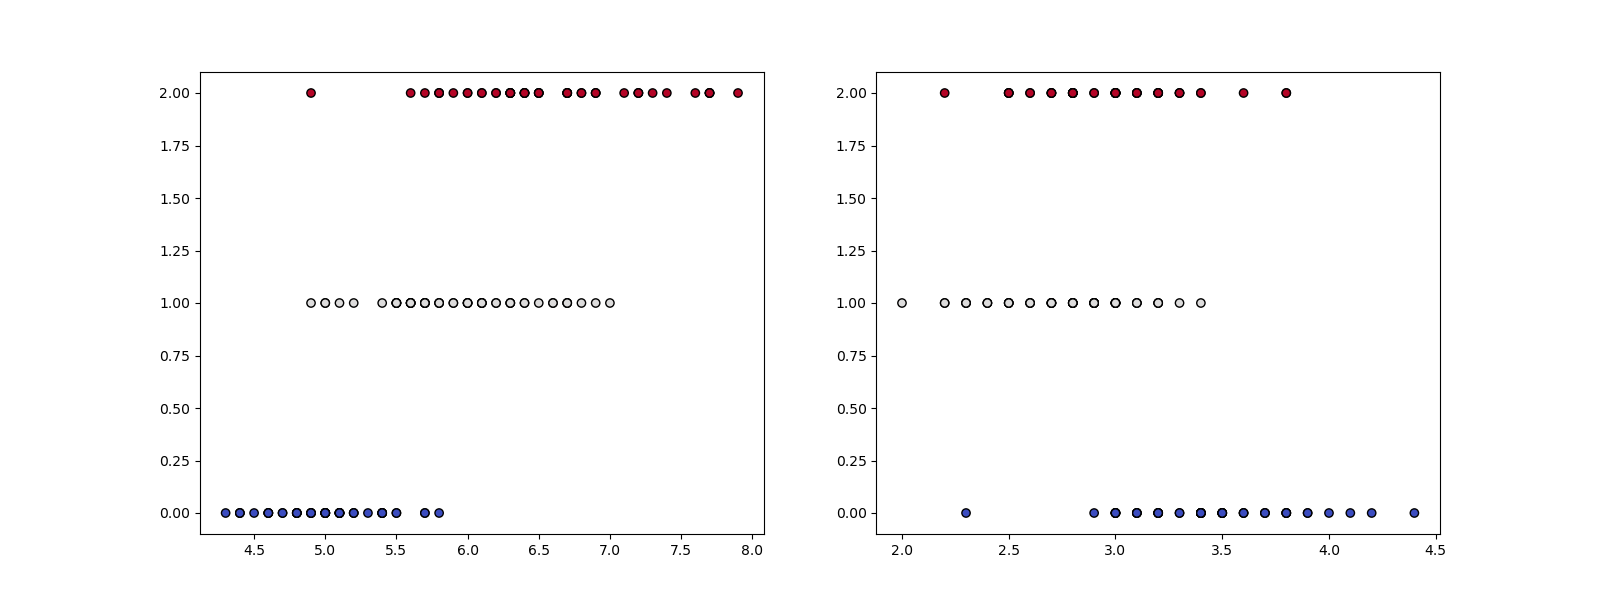

Correct classification Logistic         0.5 % of the data:  0.8266666666666667
Correct classification SVM              0.5 % of the data:  0.76
Correct classification SVML             0.5 % of the data:  0.8266666666666667
Correct classification SVMP deg3        0.5 % of the data:  0.8133333333333334
Correct classification SVMP deg2        0.5 % of the data:  0.8133333333333334
Correct classification SVMS             0.5 % of the data:  0.29333333333333333
Correct classification RFC              0.5 % of the data:  0.8
Correct classification RFC etpy         0.5 % of the data:  0.76
Correct classification KNN BT           0.5 % of the data:  0.7466666666666667
Correct classification KNN KD           0.5 % of the data:  0.7466666666666667
Correct classification KNN BRT          0.5 % of the data:  0.7466666666666667
Correct classification KNN BT wd=d      0.5 % of the data:  0.7466666666666667
Correct classification KNN KD wd=d      0.5 % of the data:  0.7466666666666667
Correct classif

In [3]:


# import some data to play with
iris = datasets.load_iris()
# Take the first two features. We could avoid this by using a two-dim dataset
X = iris.data[:, :2]
y = iris.target

n_classes = 3
    
fig, sub = plt.subplots(1, 2, figsize=(16,6))
sub[0].scatter(X[:,0], y, c=y, cmap=plt.cm.coolwarm, edgecolors='k')
sub[1].scatter(X[:,1], y, c=y, cmap=plt.cm.coolwarm, edgecolors='k')


particions = [0.5, 0.7, 0.8]

for part in particions:
    x_t, x_v, y_t, y_v = train_test_split(X, y, train_size=part)
    
    #Creem el regresor logístic
    logireg = LogisticRegression(C=2.0, fit_intercept=True, penalty='l2', tol=0.001)

    # l'entrenem
    logireg.fit(x_t, y_t)
    problr = logireg.predict_proba(x_v)
    print ("Correct classification Logistic        ", part, "% of the data: ", logireg.score(x_v, y_v))
    
    #Creem el svm
    svc = svm.SVC(C=10.0, kernel='rbf', gamma=0.9, probability=True)

    # l'entrenem 
    svc.fit(x_t, y_t)
    probsvc = svc.predict_proba(x_v)
    print ("Correct classification SVM             ", part, "% of the data: ", svc.score(x_v, y_v))
    
    #Creem el svm lineal
    svcl = svm.SVC(C=10.0, kernel='linear', gamma=0.9, probability=True)

    # l'entrenem 
    svcl.fit(x_t, y_t)
    probsvcl = svcl.predict_proba(x_v)
    print ("Correct classification SVML            ", part, "% of the data: ", svcl.score(x_v, y_v))
    
    #Creem el svm poly deg=3
    svcp = svm.SVC(C=10.0, kernel='poly', gamma=0.9, probability=True)

    # l'entrenem 
    svcp.fit(x_t, y_t)
    probsvcp = svcp.predict_proba(x_v)
    print ("Correct classification SVMP deg3       ", part, "% of the data: ", svcp.score(x_v, y_v))
    
    #Creem el svm poly deg=2
    svcp2 = svm.SVC(C=10.0, kernel='poly', degree=2, gamma=0.9, probability=True)

    # l'entrenem 
    svcp2.fit(x_t, y_t)
    probsvcp2 = svcp2.predict_proba(x_v)
    print ("Correct classification SVMP deg2       ", part, "% of the data: ", svcp2.score(x_v, y_v))
    
   
    #Creem el svm sigmoid
    svcs= svm.SVC(C=10.0, kernel='sigmoid', gamma=0.9, probability=True)

    # l'entrenem 
    svcs.fit(x_t, y_t)
    probsvcs = svcs.predict_proba(x_v)
    print ("Correct classification SVMS            ", part, "% of the data: ", svcs.score(x_v, y_v))
    
    #####
    
    #random forests gini

    clf = RandomForestClassifier(max_depth=2, random_state=0)
    clf.fit(x_t, y_t)
    probclf = clf.predict_proba(x_v)
    print ("Correct classification RFC             ", part, "% of the data: ", clf.score(x_v, y_v))
    
    #random forests entropy with n_e=1000 and md=5

    clfe = RandomForestClassifier(n_estimators=1000, max_depth=5, random_state=0,criterion="entropy")
    clfe.fit(x_t, y_t)
    probclfe = clfe.predict_proba(x_v)
    print ("Correct classification RFC etpy        ", part, "% of the data: ", clfe.score(x_v, y_v))

    #####
    
    #KNN ball_tree
    
    KNNbt = KNeighborsClassifier(n_neighbors=3,algorithm="ball_tree")
    KNNbt.fit(x_t, y_t)
    probKNNbt = KNNbt.predict_proba(x_v)
    print ("Correct classification KNN BT          ", part, "% of the data: ", KNNbt.score(x_v, y_v))
    
    #KNN kd_tree
    
    KNNkd = KNeighborsClassifier(n_neighbors=3,algorithm="kd_tree")
    KNNkd.fit(x_t, y_t)
    probKNNkd = KNNkd.predict_proba(x_v)
    print ("Correct classification KNN KD          ", part, "% of the data: ", KNNkd.score(x_v, y_v))
    
    #KNN brute
    
    KNNbrt = KNeighborsClassifier(n_neighbors=3,algorithm="brute")
    KNNbrt.fit(x_t, y_t)
    probKNNbrt = KNNbrt.predict_proba(x_v)
    print ("Correct classification KNN BRT         ", part, "% of the data: ", KNNbrt.score(x_v, y_v))
    
    #####
    
    #KNN ball_tree weights = distance
    
    KNNbtwd = KNeighborsClassifier(n_neighbors=3,algorithm="ball_tree",weights="distance")
    KNNbtwd.fit(x_t, y_t)
    probKNNbtwd = KNNbtwd.predict_proba(x_v)
    print ("Correct classification KNN BT wd=d     ", part, "% of the data: ", KNNbtwd.score(x_v, y_v))
    
    #KNN kd_tree weights = distance
    
    KNNkdwd = KNeighborsClassifier(n_neighbors=3,algorithm="kd_tree",weights="distance")
    KNNkdwd.fit(x_t, y_t)
    probKNNkdwd = KNNkdwd.predict_proba(x_v)
    print ("Correct classification KNN KD wd=d     ", part, "% of the data: ", KNNkdwd.score(x_v, y_v))
    
    #KNN brute weights = distance
    
    KNNbrtwd = KNeighborsClassifier(n_neighbors=3,algorithm="brute",weights="distance")
    KNNbrtwd.fit(x_t, y_t)
    probKNNbrtwd = KNNbrtwd.predict_proba(x_v)
    print ("Correct classification KNN BRT wd=d    ", part, "% of the data: ", KNNbrtwd.score(x_v, y_v))    
    
    print("\n")

Observem que les millors classificacions les fan el regressor logistic i el svm amb kernel lineal.

problr


<IPython.core.display.Javascript object>


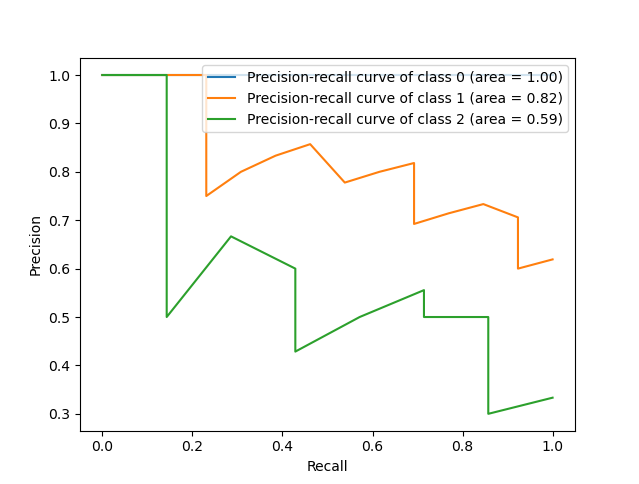

<IPython.core.display.Javascript object>


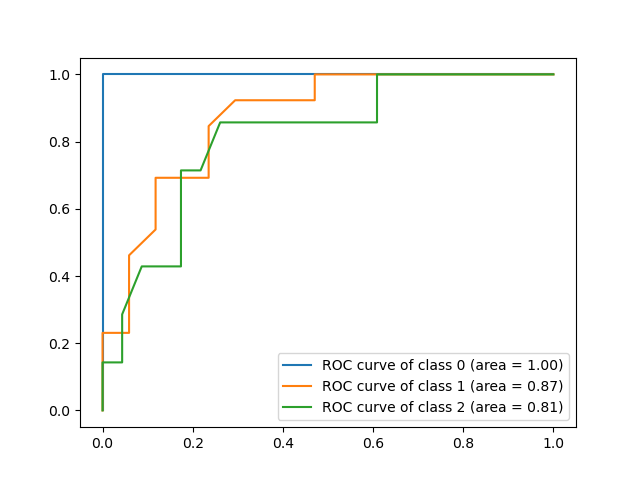

probsvc


<IPython.core.display.Javascript object>


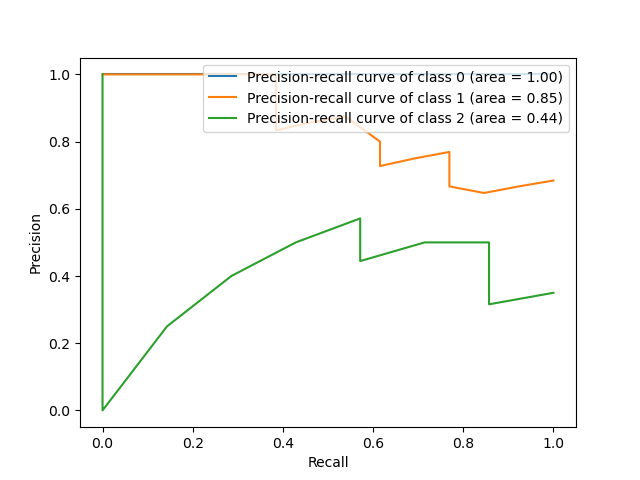

<IPython.core.display.Javascript object>


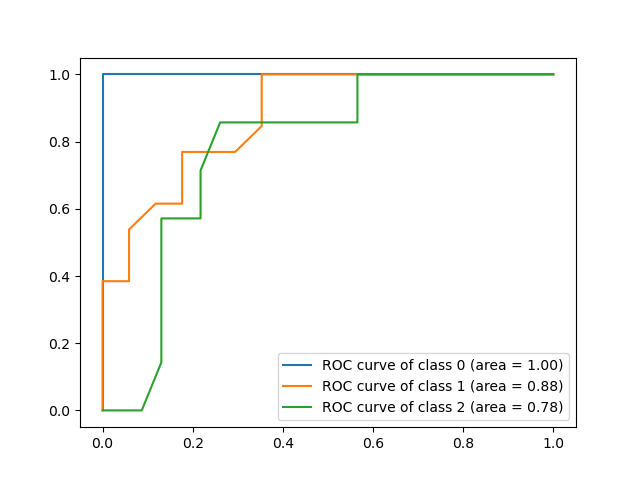

probsvcl


<IPython.core.display.Javascript object>


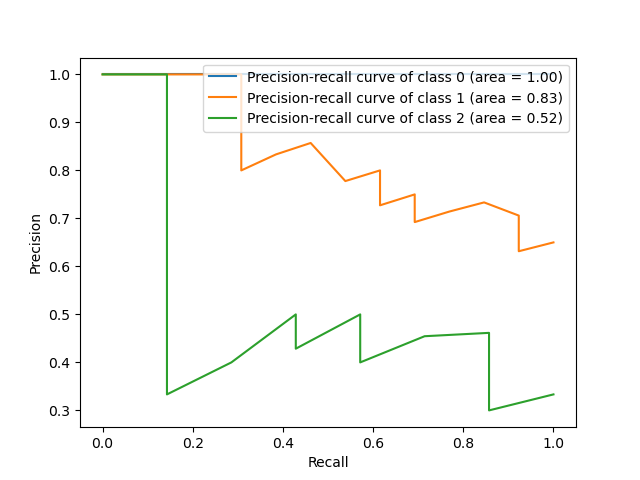

<IPython.core.display.Javascript object>


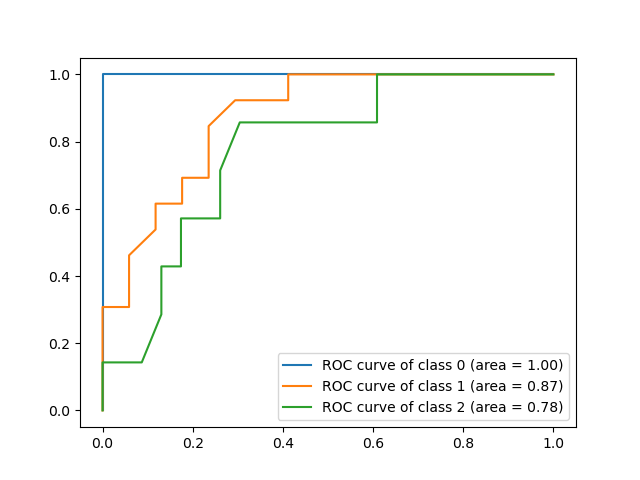

probsvcp


<IPython.core.display.Javascript object>


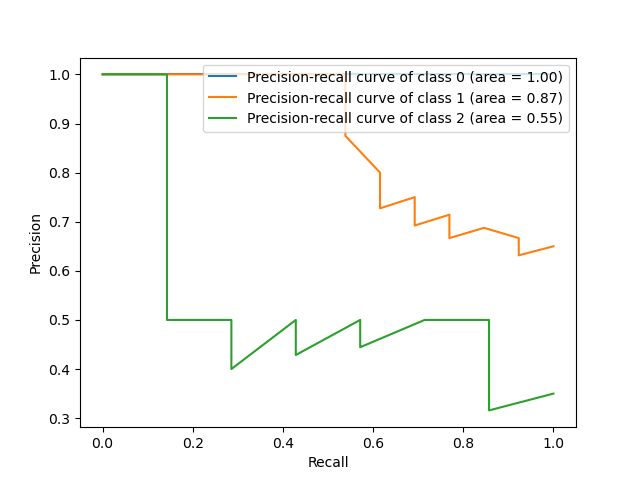

<IPython.core.display.Javascript object>


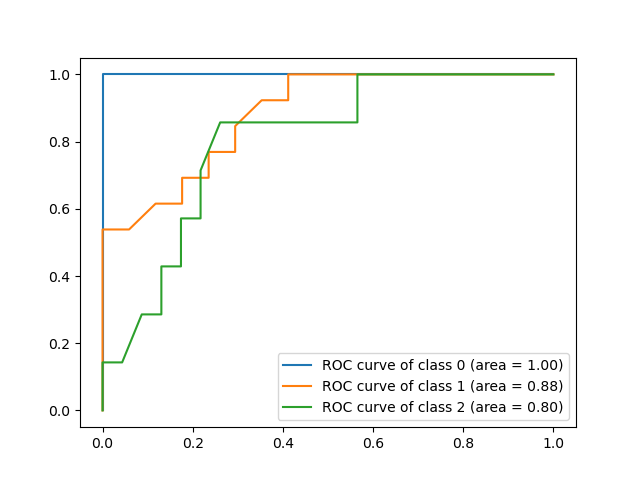

probsvcp2


<IPython.core.display.Javascript object>


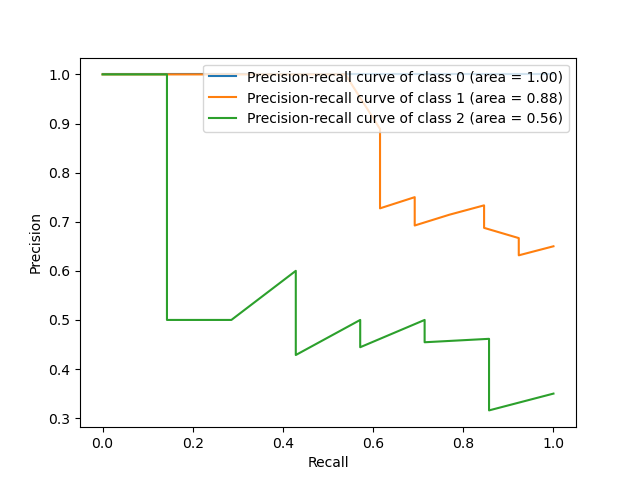

<IPython.core.display.Javascript object>


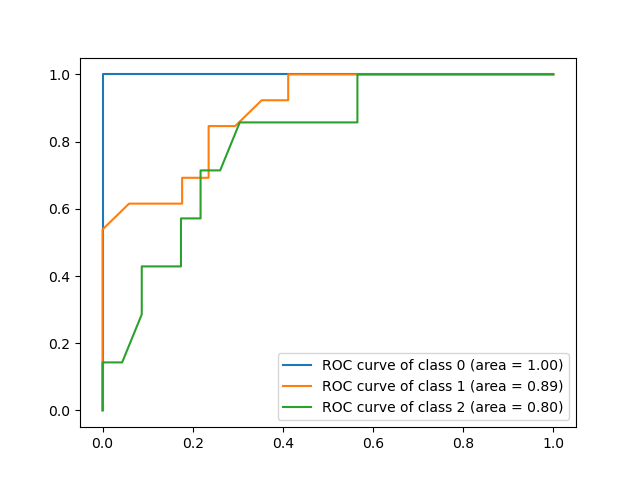

probsvcs


<IPython.core.display.Javascript object>


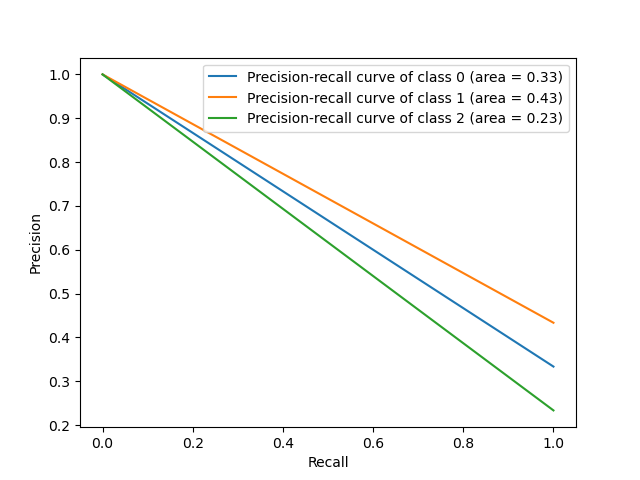

<IPython.core.display.Javascript object>


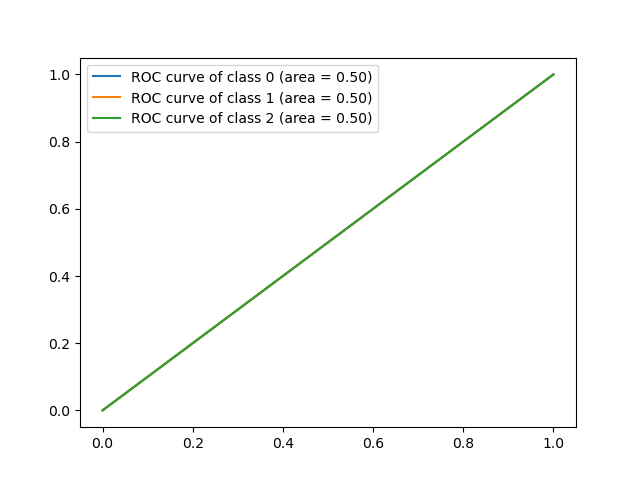

probclf


<IPython.core.display.Javascript object>


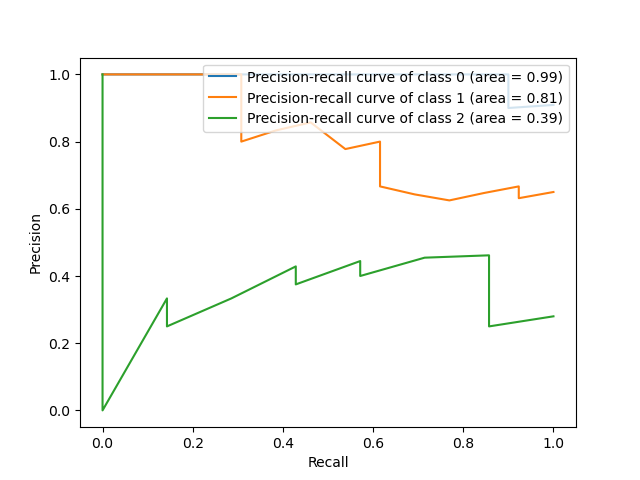

<IPython.core.display.Javascript object>


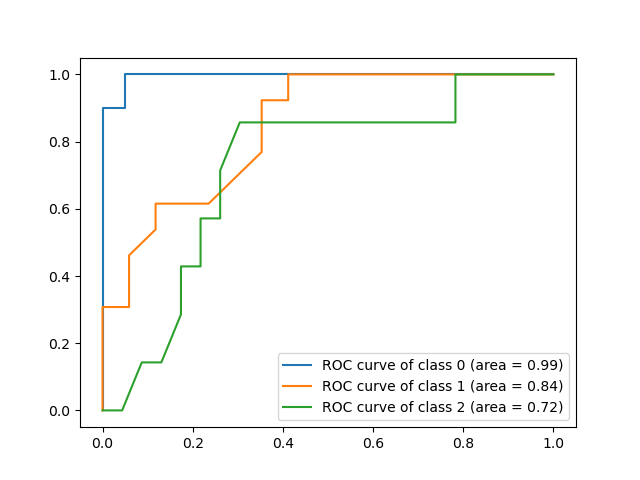

probclfe


<IPython.core.display.Javascript object>


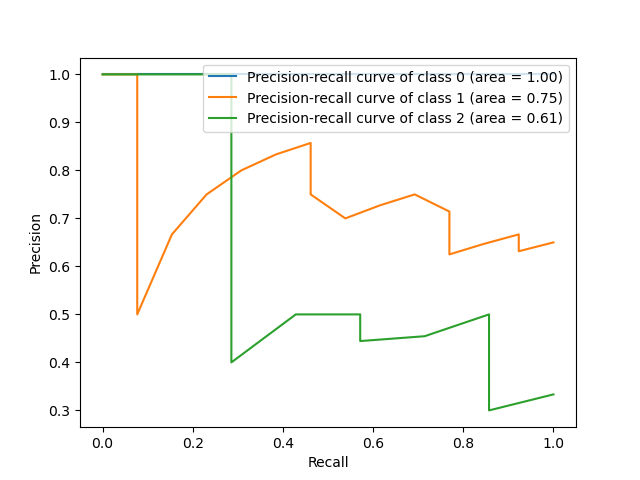

<IPython.core.display.Javascript object>


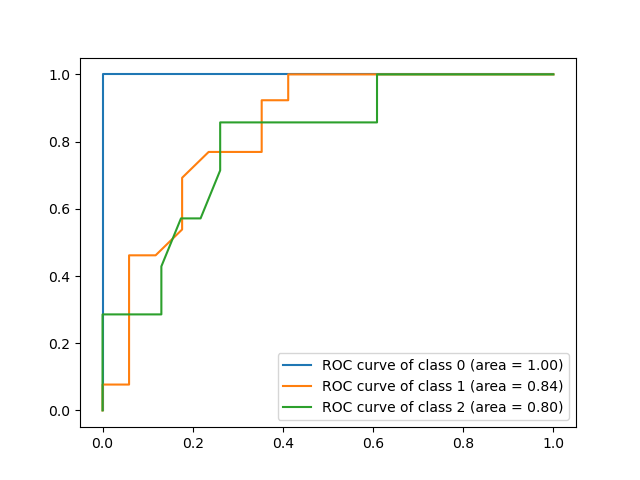

probKNNbt


<IPython.core.display.Javascript object>


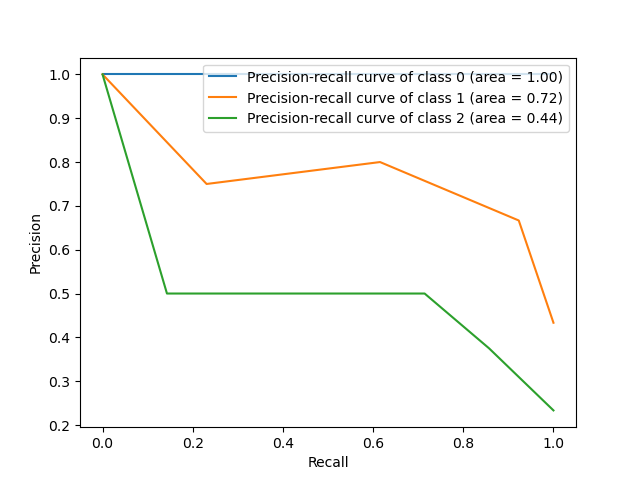

<IPython.core.display.Javascript object>


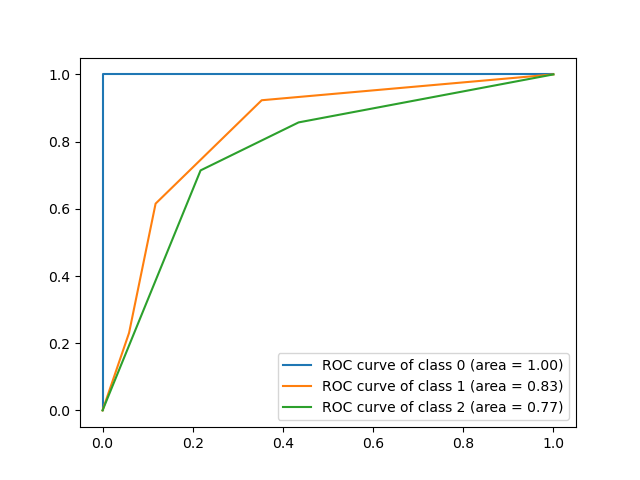

probKNNkd


<IPython.core.display.Javascript object>


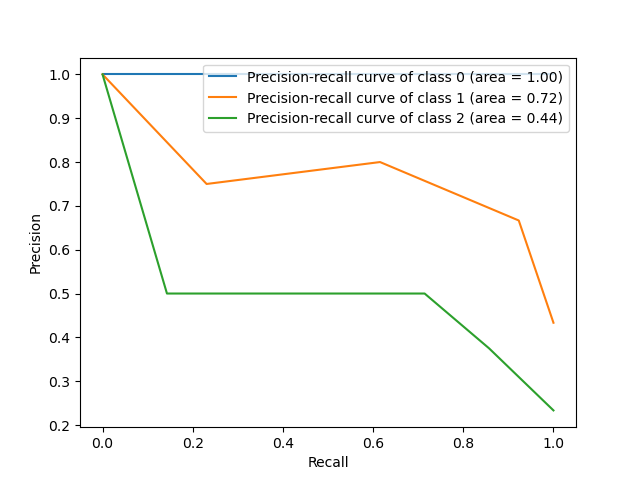

<ipython-input-4-13d7f6f4ff65>:31: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


<IPython.core.display.Javascript object>


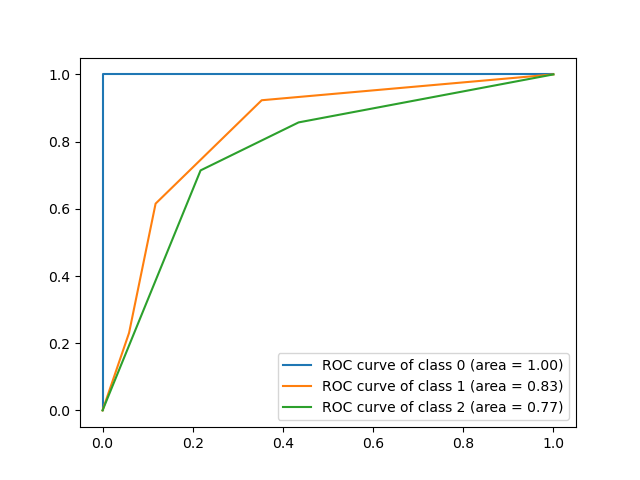

probKNNbrt


<ipython-input-4-13d7f6f4ff65>:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


<IPython.core.display.Javascript object>


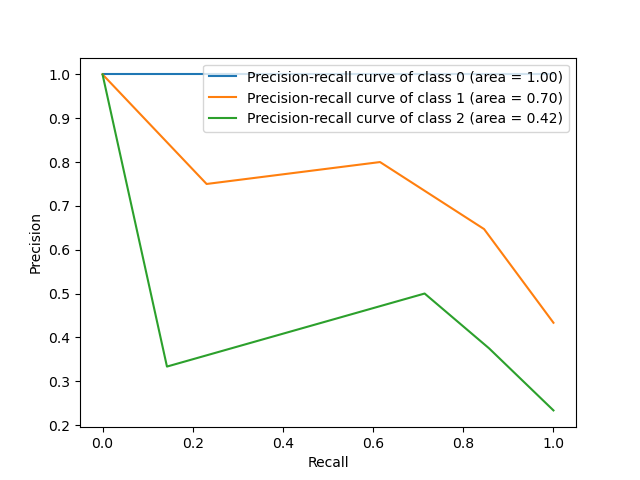

<ipython-input-4-13d7f6f4ff65>:31: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


<IPython.core.display.Javascript object>


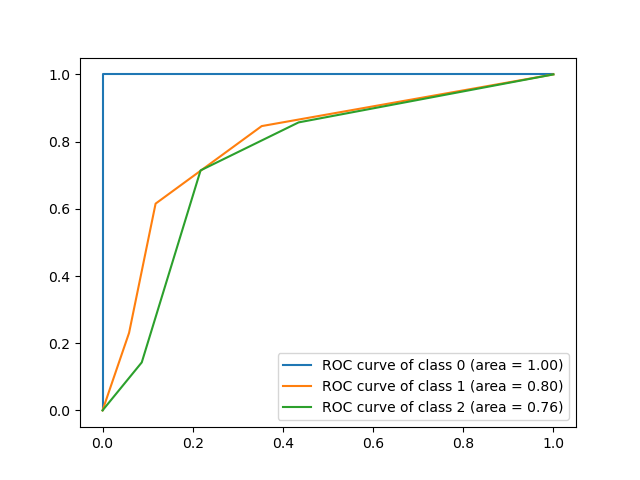

probKNNbtwd


<ipython-input-4-13d7f6f4ff65>:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


<IPython.core.display.Javascript object>


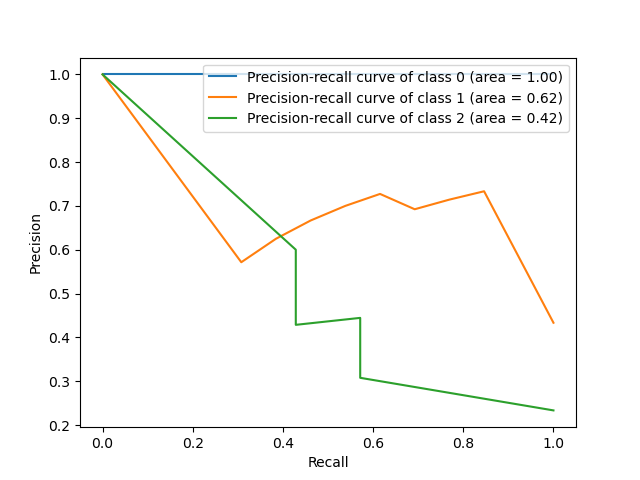

<ipython-input-4-13d7f6f4ff65>:31: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


<IPython.core.display.Javascript object>


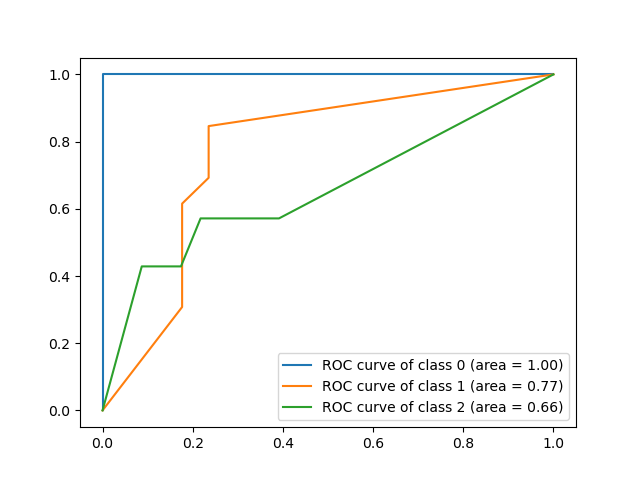

probKNNkdwd


<ipython-input-4-13d7f6f4ff65>:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


<IPython.core.display.Javascript object>


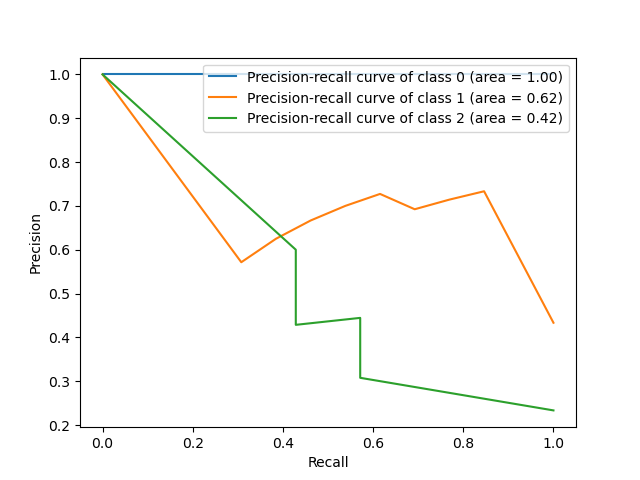

<ipython-input-4-13d7f6f4ff65>:31: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


<IPython.core.display.Javascript object>


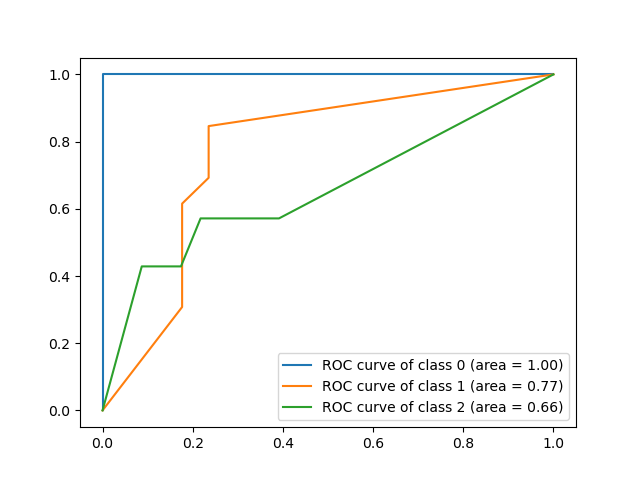

probKNNbrtwd


<ipython-input-4-13d7f6f4ff65>:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


<IPython.core.display.Javascript object>


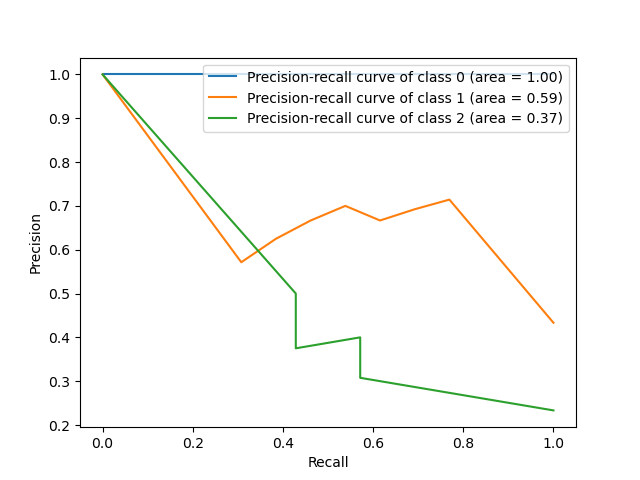

<ipython-input-4-13d7f6f4ff65>:31: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


<IPython.core.display.Javascript object>


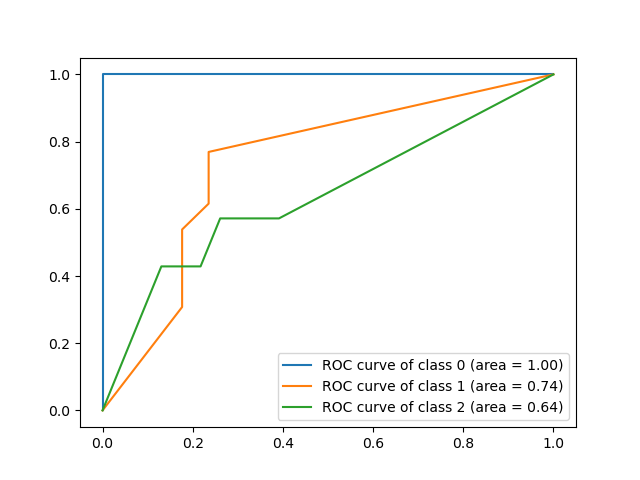

In [4]:
from sklearn.metrics import f1_score, precision_recall_curve, average_precision_score, roc_curve, auc
def compute_precision_recall(probs):
    # Compute Precision-Recall and plot curve
    precision = {}
    recall = {}
    average_precision = {}
    plt.figure()
    for i in range(n_classes):
        precision[i], recall[i], _ = precision_recall_curve(y_v == i, probs[:, i])
        average_precision[i] = average_precision_score(y_v == i, probs[:, i])

        plt.plot(recall[i], precision[i],
        label='Precision-recall curve of class {0} (area = {1:0.2f})'
                               ''.format(i, average_precision[i]))
        plt.xlabel('Recall')
        plt.ylabel('Precision')
        plt.legend(loc="upper right")

def compute_ROC(probs):
    # Compute ROC curve and ROC area for each class
    fpr = {}
    tpr = {}
    roc_auc = {}
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_v == i, probs[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC area
    # Plot ROC curve

    plt.figure()
    for i in range(n_classes):
        plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})' ''.format(i, roc_auc[i]))
    plt.legend()

probs_list=[problr,probsvc,probsvcl,probsvcp,probsvcp2,probsvcs,probclf,probclfe,probKNNbt,probKNNkd,probKNNbrt,probKNNbtwd,probKNNkdwd,probKNNbrtwd]
probs_names=["problr","probsvc","probsvcl","probsvcp","probsvcp2","probsvcs","probclf","probclfe","probKNNbt","probKNNkd","probKNNbrt","probKNNbtwd","probKNNkdwd","probKNNbrtwd"]

for i in range (len(probs_list)):
    print(probs_names[i])
    compute_precision_recall(probs_list[i])
    compute_ROC(probs_list[i])


In [5]:
import numpy as np
import matplotlib.pyplot as plt


def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

def show_C_effect(C=1.0, gamma=0.7, degree=3):

    # import some data to play with
    iris = datasets.load_iris()
    # Take the first two features. We could avoid this by using a two-dim dataset
    X = iris.data[:, :2]
    y = iris.target

    # we create an instance of SVM and fit out data. We do not scale our
    # data since we want to plot the support vectors
    # title for the plots
    titles = ('SVC with linear kernel',
              'LinearSVC (linear kernel)',
              'SVC with RBF kernel',
              'SVC with polynomial (degree 3) kernel')

    #C = 1.0  # SVM regularization parameter
    models = (svm.SVC(kernel='linear', C=C),
              svm.LinearSVC(C=C, max_iter=1000000),
              svm.SVC(kernel='rbf', gamma=gamma, C=C),
              svm.SVC(kernel='poly', degree=degree, gamma='auto', C=C))
    models = (clf.fit(X, y) for clf in models)

    plt.close('all')
    fig, sub = plt.subplots(2, 2, figsize=(14,9))
    plt.subplots_adjust(wspace=0.4, hspace=0.4)

    X0, X1 = X[:, 0], X[:, 1]
    xx, yy = make_meshgrid(X0, X1)

    for clf, title, ax in zip(models, titles, sub.flatten()):
        plot_contours(ax, clf, xx, yy,
                      cmap=plt.cm.coolwarm, alpha=0.8)
        ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xlabel('Sepal length')
        ax.set_ylabel('Sepal width')
        ax.set_xticks(())
        ax.set_yticks(())
        ax.set_title(title)

    plt.show()


<IPython.core.display.Javascript object>


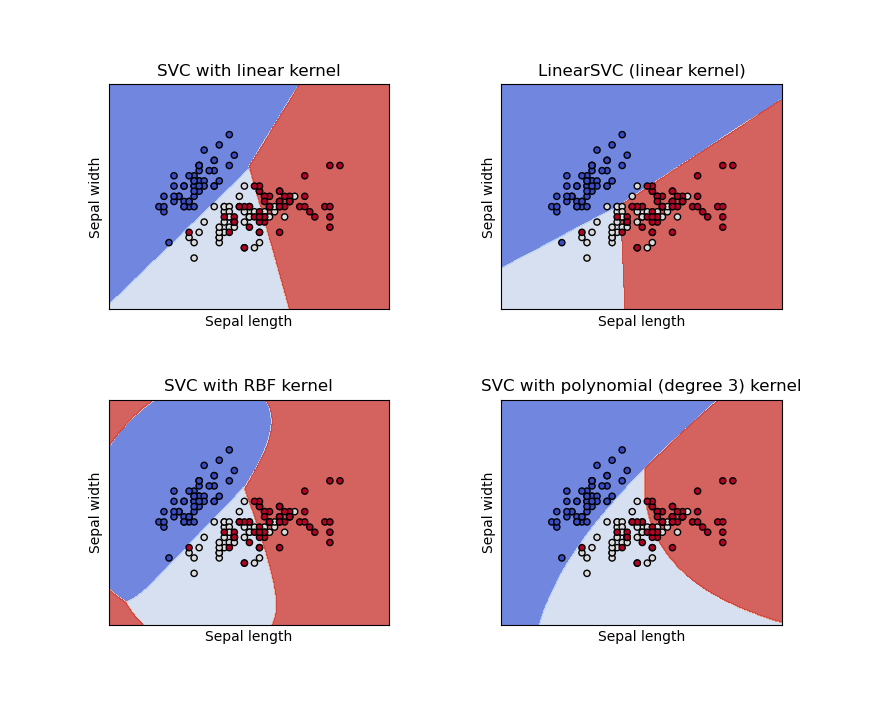

In [6]:
show_C_effect(C=0.1)

<IPython.core.display.Javascript object>


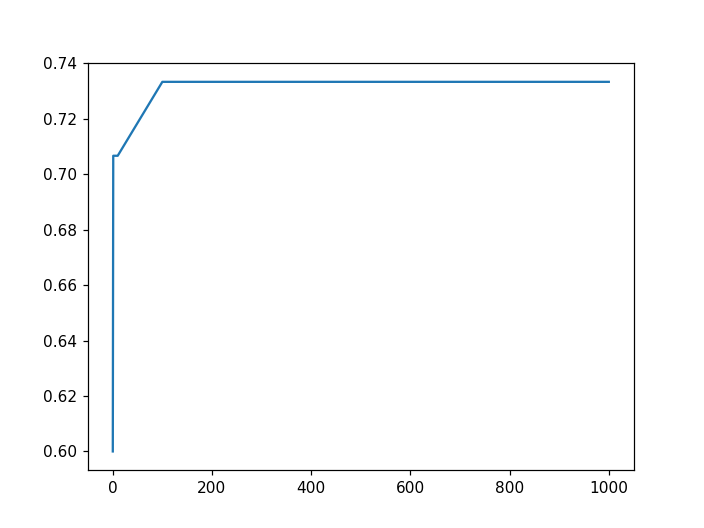

<IPython.core.display.Javascript object>


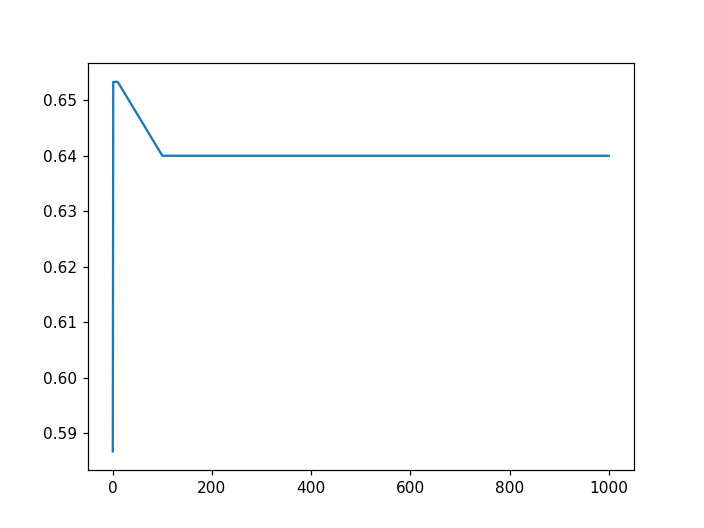

C:\Users\joelg\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


<IPython.core.display.Javascript object>


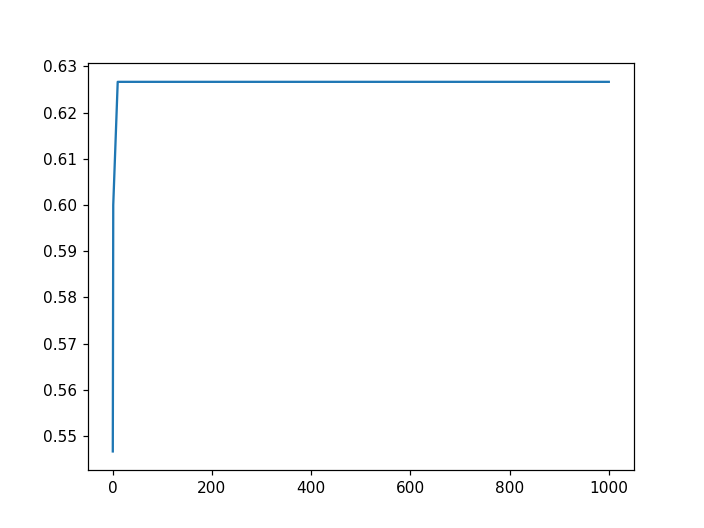

<IPython.core.display.Javascript object>


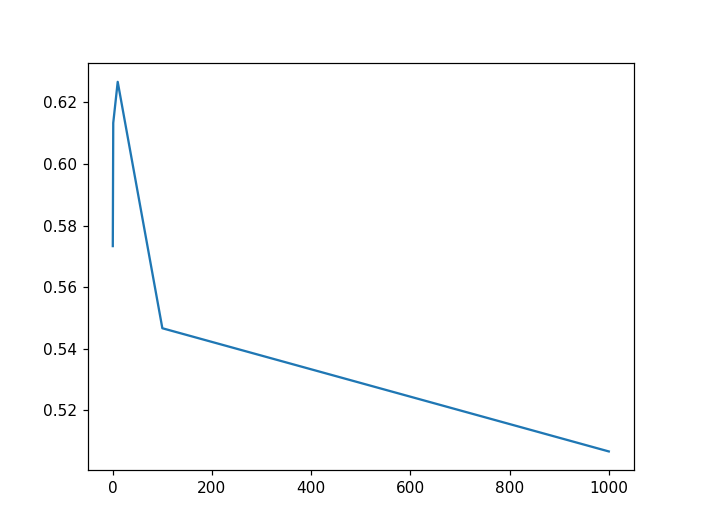

<IPython.core.display.Javascript object>


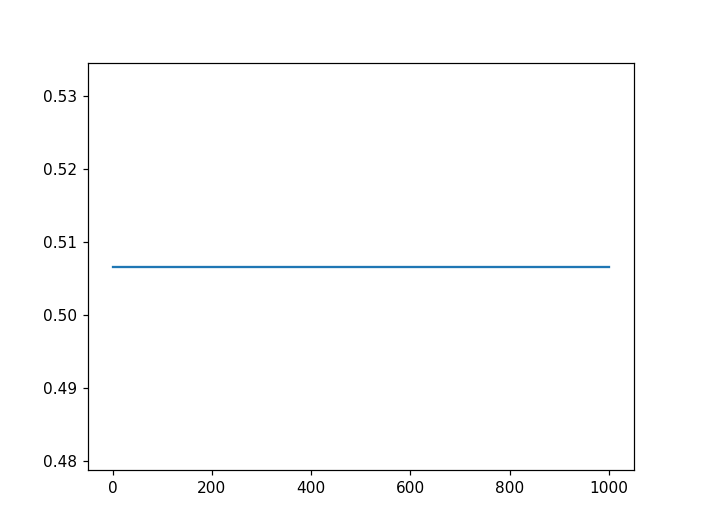

[0.5066666666666667, 0.5066666666666667, 0.5066666666666667, 0.5066666666666667, 0.5066666666666667]


In [46]:
part=0.5
gamma=0.7
degree=3
CS=[0.1,1,10,100,1000]
x_t, x_v, y_t, y_v = train_test_split(X, y, train_size=part)
scores=[]
for C in CS:
    svc = LogisticRegression(C=C, fit_intercept=True, penalty='l2', tol=0.001)
    # l'entrenem 
    svc.fit(x_t, y_t)
    scores.append(svc.score(x_v,y_v))
plt.figure()
plt.plot(CS, scores)

scores=[]
for C in CS:
    svc = svm.SVC(kernel='linear', C=C)
    # l'entrenem 
    svc.fit(x_t, y_t)
    scores.append(svc.score(x_v,y_v))
plt.figure()
plt.plot(CS, scores)


scores=[]
for C in CS:
    svc = svm.LinearSVC(C=C, max_iter=1000000)
    # l'entrenem 
    svc.fit(x_t, y_t)
    scores.append(svc.score(x_v,y_v))
plt.figure()
plt.plot(CS, scores)

scores=[]
for C in CS:
    svc = svm.SVC(C=C, kernel='rbf', gamma=gamma)
    # l'entrenem 
    svc.fit(x_t, y_t)
    scores.append(svc.score(x_v,y_v))
plt.figure()
plt.plot(CS, scores)

scores=[]
for C in CS:
    svm.SVC(kernel='poly', degree=degree, gamma='auto', C=C)
    svc.fit(x_t, y_t)
    scores.append(svc.score(x_v,y_v))
plt.figure()
plt.plot(CS, scores)
print(scores)


In [ ]:
# Visualitzarem només 3 decimals per mostra
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Funcio per a llegir dades en format csv
def load_dataset(path):
    dataset = pd.read_csv(path, header=0, delimiter=',',decimal='.')
    return dataset

# Carreguem dataset d'exemple
dataset = load_dataset('pokemon1.csv')
data = dataset.values
dataset.isnull().sum() 

In [ ]:
dataset["type2"][dataset["type2"].isna()]=dataset["type1"][dataset["type2"].isna()]

In [ ]:
dataset=dataset.drop(["name","japanese_name","pokedex_number","percentage_male","abilities","classfication"],axis=1)

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler
label_encoder = sklearn.preprocessing.LabelEncoder() 
dataset['type1'] = label_encoder.fit_transform(dataset['type1'])
dataset['type2'] = label_encoder.fit_transform(dataset['type2'])

In [ ]:
dataset['type2']

In [ ]:
correlacio = dataset.corr()
plt.figure()
ax = sns.heatmap(correlacio, annot=True, linewidths=.5)
relacio = sns.pairplot(dataset)

In [ ]:
correlacio["is_legendary"]